# Analysis of Road Safety

**To-do:**
- [ ] Select couple of years (2018,2014,2010)
- [ ] Display total accident heatmaps 
- [ ] Graph the occurances of accidents per state
    - [ ] Graph occurances of accidents per state w/ interstate speeds

**Dependencies:**
    - cartopy 
    - easydict
    - geojson


**Jupyter Extension Installation:**
1. Enable extensions: **jupyter nbextension enable --py --sys-prefix widgetsnbextension**

2. Install gmaps: **pip install gmaps**

3. Enable gmaps: **jupyter nbextension enable --py --sys-prefix gmaps**


In [1]:
from config import config
import parser
import os
import sys
import geojson
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import numpy as np

In [2]:
# import parser data:
fars_years = parser.generateFARS(2018)
fars_2018_files = parser.grabFiles(fars_years)
index = 3
print("Reading file: ", fars_2018_files[index])

category = parser.grabCat(fars_2018_files)
cat = category[index]
accidents = parser.csvRead(os.path.join(parser.ROOT, fars_years, fars_2018_files[index]), cat)

# import cartopy stuff:
us_shapes = list(shpreader.Reader('shapes/gadm36_USA_1.shp').geometries())
#extent = [-128,-67,50, 25] #x1,x2,y1,y2

Reading file:  ACCIDENT.csv


In [3]:
# List coordinates:
print('Number of accidents in 2018 US', len(accidents))
accident_tuples = []
for item in accidents:
    if item['LATITUDE'] != 99.9999 and item['LONGITUD'] != 777.7777:
        accident_tuples.append( (item['LATITUDE'], item['LONGITUD']) )

Number of accidents in 2018 US 33654


In [4]:
max_lng, min_lng = -10000,10000
max_lat, min_lat = 0,10000

for acc in accident_tuples:
    if max_lng <= acc[1]:
        max_lng = acc[1]
    if min_lng >= acc[1]:
        min_lng = acc[1]
        
    if max_lat <= acc[0]:
        max_lat = acc[0]
    if min_lat >= acc[0]:
        min_lat = acc[0]

regular_lat = max_lat-min_lat
regular_lng = max_lng+(abs(min_lng))

print("regular_lat: ", regular_lat, "regular_lng: ", regular_lng)
print("max_lng: ", max_lng, "min_lng: ", min_lng)
print("max_lat: ", max_lat, "min_lat: ", min_lat)
extent = [max_lng, min_lng,max_lat,min_lat] #y1,y2,x1,x2

regular_lat:  50.61651666 regular_lng:  96.01705559
max_lng:  -67.01511111 min_lng:  -163.0321667
max_lat:  69.73334722 min_lat:  19.11683056


(600, 300) (600,) (300,)
(300, 600)


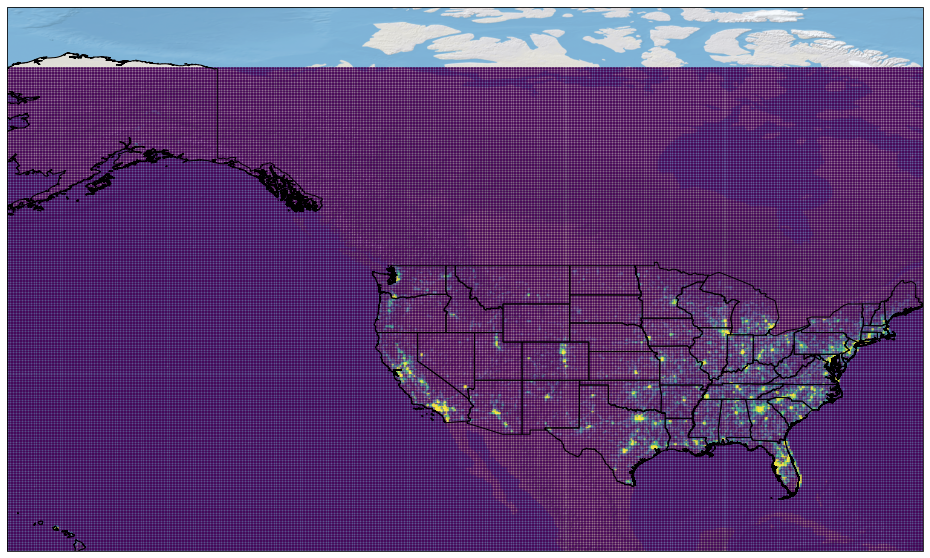

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.imshow(imread('shapes/NE1_50M_SR_W.tif'), origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none')
#ax.add_feature(cfeature.BORDERS)
ax.set_extent(extent)

#heat_data = np.random.normal(0.0,1.0,size=(400,200))
heat_data = np.zeros((600,300))

for item in accident_tuples:
    _lat, _lon = \
                    heat_data.shape[1]*((max_lat-item[0])/regular_lat), \
                    heat_data.shape[0]*((abs(item[1])-abs(max_lng))/regular_lng)
    if heat_data[int(_lon)-1][int(_lat)-1] <= 10:
        heat_data[int(_lon)-1][int(_lat)-1] += 1
 
lat = np.linspace(extent[0],extent[1],heat_data.shape[0])
lon = np.linspace(extent[2],extent[3],heat_data.shape[1])
print(heat_data.shape, lat.shape, lon.shape)
Lat,Lon = np.meshgrid(lat,lon)
print(Lat.shape)
ax.pcolormesh(Lat,Lon,np.transpose(heat_data), alpha=0.5)

plt.show()